In [1]:
#1. Perform Steps 1 and 2 of the "Exercise 1" of this chapter, i.e., load the diabetes dataset into the workspace, and then shrink it to only one feature "bmi." This the new dataset that we will use for this exercise.
#2. Train a K-NN regression model with K=3 on the new dataset obtained in the previous exercise.
#3. Plot and display the fitted regression curve on the scatter plot.
#4. Compare the MSE, MAE, and the R² of the K-NN regression model to those of the linear regression model. Which model performs better?

In [2]:
#step 1
import pandas as pd

data = pd.read_csv('C:\\Users\\malfa\\Desktop\\python program course\\diabetes.csv')
y = data.pop("response_interest")
N, p = data.shape
print("Dataset contains {} samples and {} features.\n".format(N, p))

print(data.describe())

print("\nNumber of missing values in each feature: ")
print(data.isnull().sum())

samples_with_missing_value = data.isnull().any(axis=1)
y = y[~samples_with_missing_value]
X = data.dropna()

Dataset contains 442 samples and 10 features.

              age         sex         bmi          bp          tc         ldl  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

              hdl         tch         ltg         glu  
count  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  
std     12.934202    1.290450    0.522391   11.496335  

In [3]:
from sklearn.neighbors import KNeighborsRegressor

In [4]:
knn_reg = KNeighborsRegressor(n_neighbors=3, metric='euclidean')

In [5]:
knn_reg.fit(X, y)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [6]:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [7]:
x_test = X.iloc[3:4,:]
y_hat_test = knn_reg.predict(x_test)
print("Actual target value for the sample in index 3 = {:.2f}".format(y[3]))
print("Estimated target value for the sample in index 3 = {:.2f}".format(y_hat_test[0]))

Actual target value for the sample in index 3 = 206.00
Estimated target value for the sample in index 3 = 222.00


In [8]:
#step 2
X_new = X.copy()
X_new = X_new.loc[range(442), "bmi"]
y_new = y.copy()
y_new = y_new.loc[range(442)]

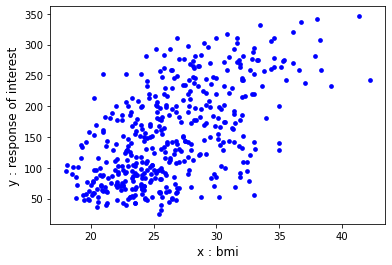

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_new, y_new, color='blue', marker='.', linewidth=1.75, label='Data points')
ax.set_xlabel("x : bmi", fontsize=12);
ax.set_ylabel("y : response of interest", fontsize=12)
plt.show()

In [10]:
X_new = X_new.values
X_new = X_new.reshape(-1, 1)
knn_reg_new = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
knn_reg_new.fit(X_new, y_new)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

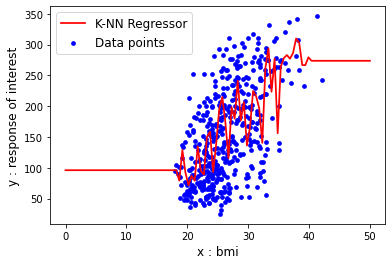

In [11]:
#step 3
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.scatter(X_new,y_new, color='blue', marker='.',linewidth=1.75,label='Data points')
ax.set_xlabel("x : bmi", fontsize=12);
ax.set_ylabel("y : response of interest", fontsize=12)

X_test = np.linspace(0,50,100).reshape(-1,1)
y_pred = knn_reg_new.predict(X_test)
ax.plot(X_test, y_pred, color='red', linewidth=1.75, label="K-NN Regressor")
ax.legend(fontsize=12)

plt.show()

In [12]:
#step 4
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_test = knn_reg.predict(X)
mse = mean_squared_error(y, y_test)
mae = mean_absolute_error(y, y_test)
r2 = r2_score(y, y_test)
print("Training set MSE = {:.2f}".format(mse))
print("Training set MAE = {:.2f}".format(mae))
print("Training set R-sqaured = {:.2f}".format(r2))

Training set MSE = 2684.03
Training set MAE = 41.01
Training set R-sqaured = 0.55


In [13]:
#R2 provides an indication of goodness of fit and therefore, 
#a measure of how well the unseen samples are likely to be predicted by the model.
#both of them are 0.5 and have Moderate fitting.